<center><h1>Using Machine Learning to predict songs liked by people on Spotify</h1></center>

In this article we will be building a small project where we will learn how machine learning model is used for predicting various things around us. So in this project, our motto in the project is to **predict whether user will like a song or not** based on the songs present in the spotify playlist. Here the dataset which will be used is already created. The dataset built in our previous article on <a href="">Web Scraping</a> will be used. This dataset in the **csv** format consists of all audio and technical information about the tracks of a single playlist. 

So it's time that we should start off with this tutorial and learn as much as we can.

# Importing necessary libraries

Initially required libraries are loaded for performing different operations.

In [411]:
import json
import numpy as np
import pandas as pd

In the below code, a json file is loaded. This file contains the **URI(Uniform resource indicator)** of the Spotify playlists. Information about these playlists is fetched using the URI. Along with this, **like** attribute is used to denote whether user likes the playlist or not. These details have already been covered in the previous article, where we created a dataset. You can look at the article from <a href=""><b>here</b></a>. 

In [412]:
playlists = json.load(open('playlists_like_dislike.json'))
playlist_uri = playlists[playlist_index]['uri']
like = playlists[playlist_index]['like']

## Loading dataset 

As already mentioned, you can build as large dataset as you want. Here in this article, I will be using two csv files, where one of them contains the list of audio tracks which I like and other csv file contains the list of songs which I dislike. Now we will be loading these csv files in our jupyter notebook for further processing.

In [413]:
like_songs = pd.read_csv("playlist_0.csv",index_col=[0])

like_songs.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments
0,3h4T9Bg8OVSUYa6danHeH5,Animals,Maroon 5,['Maroon 5'],0.279,0.742,4,-6.460,0,0.000185,0.000000,0.5930,0.328,189.868,231013,4,162,11,921
1,4pbJqGIASGPr0ZpGpnWkDn,We Will Rock You - Remastered,Queen,['Queen'],0.692,0.497,2,-7.316,1,0.676000,0.000000,0.2590,0.475,81.308,122067,4,42,6,353
2,6b3b7lILUJqXcp6w9wNQSm,Cheap Thrills,Sia,"['Sia', 'Sean Paul']",0.592,0.800,6,-4.931,0,0.056100,0.000002,0.0775,0.728,89.972,224813,4,83,8,914
3,2tpWsVSb9UEmDRxAl1zhX1,Counting Stars,OneRepublic,['OneRepublic'],0.664,0.705,1,-4.972,0,0.065400,0.000000,0.1180,0.477,122.016,257267,4,129,8,1001
4,1zB4vmk8tFRmM9UULNzbLB,Thunder,Imagine Dragons,['Imagine Dragons'],0.605,0.822,0,-4.833,1,0.006710,0.134000,0.1470,0.288,167.997,187147,4,128,10,614


In [414]:
dislike_songs = pd.read_csv("playlist_1.csv",index_col=[0])

dislike_songs.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments
0,7oRA6vzbUl5brLK7GDcKOJ,"Fikar Not (From ""Chhichhore"")",Nakash Aziz,"['Nakash Aziz', 'Dev Negi', 'Amit Mishra', 'Am...",0.608,0.848,5,-6.826,0,0.3750,0.001800,0.0580,0.869,185.884,189073,3,191,10,903
1,5cgKosPPj5Cs9a2JQufUc1,Ilahi,Arijit Singh,['Arijit Singh'],0.594,0.967,9,-5.767,1,0.1660,0.000025,0.1050,0.452,132.009,228982,4,124,11,899
2,5fXslGZPI5Cco6PKHzlSL3,"Illegal Weapon 2.0 (From ""Street Dancer 3D"")",Jasmine Sandlas,"['Jasmine Sandlas', 'Garry Sandhu', 'Tanishk B...",0.805,0.919,1,-1.294,1,0.1010,0.003430,0.0598,0.494,94.993,188606,4,72,9,895
3,06wTXKpDMrSp5OfB7MErpx,Befikra,Meet Bros.,"['Meet Bros.', 'Aditi Singh Sharma']",0.600,0.979,10,-3.513,1,0.1380,0.000000,0.1000,0.453,137.064,351579,4,200,20,1443
4,6gbZvxPMHrpIA8RAscDO9D,Jigra,Shashwat Sachdev,"['Shashwat Sachdev', 'Siddharth Basrur']",0.712,0.655,8,-7.813,1,0.0694,0.000000,0.1030,0.145,99.978,240000,4,98,10,1017


## Classification of tracks for identifying songs likeness

As we are looking to classify songs on the basis of user's liking, therefore we need to classify them individually for training purposes.

For this the playlist which had **like** attribute as **true** in the **playlists_like_dislike.json** file, all the songs of that playlist will be classified as **liked songs** and when like attribute is **false**, then all the songs will be classified as **disliked.**.
 
Using the below code, the song which **user likes is denoted through '1'** and song which is **disliked is denoted through '0'**. The **song_like** attribute will be added as column in our dataframe. 

The values of **song_like** column will help in training and building of the machine learning model, which will be subsequently used for predicting whether a user will like the songs of a playlist. 

In [415]:
like_songs['song_like'] = np.ones((len(like_songs), 1), dtype=int)

like_songs.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,song_like
0,3h4T9Bg8OVSUYa6danHeH5,Animals,Maroon 5,['Maroon 5'],0.279,0.742,4,-6.460,0,0.000185,0.000000,0.5930,0.328,189.868,231013,4,162,11,921,1
1,4pbJqGIASGPr0ZpGpnWkDn,We Will Rock You - Remastered,Queen,['Queen'],0.692,0.497,2,-7.316,1,0.676000,0.000000,0.2590,0.475,81.308,122067,4,42,6,353,1
2,6b3b7lILUJqXcp6w9wNQSm,Cheap Thrills,Sia,"['Sia', 'Sean Paul']",0.592,0.800,6,-4.931,0,0.056100,0.000002,0.0775,0.728,89.972,224813,4,83,8,914,1
3,2tpWsVSb9UEmDRxAl1zhX1,Counting Stars,OneRepublic,['OneRepublic'],0.664,0.705,1,-4.972,0,0.065400,0.000000,0.1180,0.477,122.016,257267,4,129,8,1001,1
4,1zB4vmk8tFRmM9UULNzbLB,Thunder,Imagine Dragons,['Imagine Dragons'],0.605,0.822,0,-4.833,1,0.006710,0.134000,0.1470,0.288,167.997,187147,4,128,10,614,1


In [416]:
dislike_songs['song_like'] = np.zeros((len(dislike_songs), 1), dtype=int)

dislike_songs.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,song_like
0,7oRA6vzbUl5brLK7GDcKOJ,"Fikar Not (From ""Chhichhore"")",Nakash Aziz,"['Nakash Aziz', 'Dev Negi', 'Amit Mishra', 'Am...",0.608,0.848,5,-6.826,0,0.3750,0.001800,0.0580,0.869,185.884,189073,3,191,10,903,0
1,5cgKosPPj5Cs9a2JQufUc1,Ilahi,Arijit Singh,['Arijit Singh'],0.594,0.967,9,-5.767,1,0.1660,0.000025,0.1050,0.452,132.009,228982,4,124,11,899,0
2,5fXslGZPI5Cco6PKHzlSL3,"Illegal Weapon 2.0 (From ""Street Dancer 3D"")",Jasmine Sandlas,"['Jasmine Sandlas', 'Garry Sandhu', 'Tanishk B...",0.805,0.919,1,-1.294,1,0.1010,0.003430,0.0598,0.494,94.993,188606,4,72,9,895,0
3,06wTXKpDMrSp5OfB7MErpx,Befikra,Meet Bros.,"['Meet Bros.', 'Aditi Singh Sharma']",0.600,0.979,10,-3.513,1,0.1380,0.000000,0.1000,0.453,137.064,351579,4,200,20,1443,0
4,6gbZvxPMHrpIA8RAscDO9D,Jigra,Shashwat Sachdev,"['Shashwat Sachdev', 'Siddharth Basrur']",0.712,0.655,8,-7.813,1,0.0694,0.000000,0.1030,0.145,99.978,240000,4,98,10,1017,0


As you would **scroll sideways** in both the dataframes shown above, you would find **song_like** column.

We can also check the number of rows and columns present in a dataframe. Since we have to operate over these two different dataframes, it is better if we concatenate these two dataframes into a single dataframe. I have used append function for this.

In [417]:
like_songs.shape

(99, 20)

In [418]:
dislike_songs.shape

(75, 20)

In [419]:
songs = like_songs.append(dislike_songs,ignore_index=False)

songs.tail()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,song_like
70,4eu27jAU2bbnyHUC3G75U8,Badtameez Dil,Benny Dayal,"['Benny Dayal', 'Shefali Alvares']",0.805,0.932,2,-2.228,0,0.24000,0.00000,0.2160,0.792,106.019,252760,4,109,10,1133,0
71,7oDykOViQGiV9M3enF7u4Y,La La La,Neha Kakkar,"['Neha Kakkar', 'Arjun Kanungo']",0.774,0.781,10,-4.426,1,0.34100,0.00000,0.1110,0.469,100.017,192000,4,76,7,745,0
72,79JMjG6tj2zvCDEukCSgcx,Laung Gawacha,Nucleya,"['Nucleya', 'Avneet Khurmi']",0.571,0.900,0,-4.855,0,0.00502,0.00916,0.0952,0.414,91.985,213913,4,81,8,1039,0
73,5T3rp70MEW4XnWv82BDVey,Nikle Currant,Jassie Gill,"['Jassie Gill', 'Neha Kakkar', 'Sukh-E Muzical...",0.811,0.921,5,-3.152,0,0.18200,0.00000,0.8230,0.756,94.980,212925,4,84,13,980,0
74,01X09TTUbyJWQPlv28gUss,Prada,Jass Manak,['Jass Manak'],0.721,0.650,9,-5.426,0,0.03610,0.00000,0.3580,0.502,156.008,182115,4,114,8,715,0


As it can be seen, the **songs** dataframe has 174 rows i.e. rows of first and second csv files are successfully added.

In [420]:
songs.shape

(174, 20)

Sometimes there can be a scenario where duplicate values are present in the dataframe, to remove the duplicate rows, we will be using the duplicate function.

As it can be seen, the row count has been same. Thus there are no duplicate values.

In [421]:
songs = songs.drop_duplicates()

songs.shape

(174, 20)

In this project where we are predicting whether user will like a song or not, so for this purpose we don't require the information contained in columns like **id**, **first_artist** and **all_artists**, therefore we will drop these columns from the dataframe. 

In [422]:
songs = songs.drop(['id','first_artist','all_artists'], axis = 1)

In [423]:
songs.head()

,title,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,song_like
0,Animals,0.279,0.742,4,-6.460,0,0.000185,0.000000,0.5930,0.328,189.868,231013,4,162,11,921,1
1,We Will Rock You - Remastered,0.692,0.497,2,-7.316,1,0.676000,0.000000,0.2590,0.475,81.308,122067,4,42,6,353,1
2,Cheap Thrills,0.592,0.800,6,-4.931,0,0.056100,0.000002,0.0775,0.728,89.972,224813,4,83,8,914,1
3,Counting Stars,0.664,0.705,1,-4.972,0,0.065400,0.000000,0.1180,0.477,122.016,257267,4,129,8,1001,1
4,Thunder,0.605,0.822,0,-4.833,1,0.006710,0.134000,0.1470,0.288,167.997,187147,4,128,10,614,1


Now we will be creating another dataframe where we will drop the **title** column as well. Thi is because while building machine learning model, we don't want our model to encounter values which are in the form of **string**, thus we are dropping it. 

We didn't dropped **title** column in the previous dataframe because we will require the **title** attribute to showcase our results.

In [361]:
prediction = songs.drop(['title'], axis = 1)

In [362]:
prediction.head()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,song_like,pred_class
0,0.279,0.742,4,-6.460,0,0.000185,0.000000,0.5930,0.328,189.868,231013,4,162,11,921,1,1
1,0.692,0.497,2,-7.316,1,0.676000,0.000000,0.2590,0.475,81.308,122067,4,42,6,353,1,1
2,0.592,0.800,6,-4.931,0,0.056100,0.000002,0.0775,0.728,89.972,224813,4,83,8,914,1,0
3,0.664,0.705,1,-4.972,0,0.065400,0.000000,0.1180,0.477,122.016,257267,4,129,8,1001,1,0
4,0.605,0.822,0,-4.833,1,0.006710,0.134000,0.1470,0.288,167.997,187147,4,128,10,614,1,1


# Exploring data through plotting the data

As a part of machine learning model building process, we must get acquainted to our data. For fulfilling this purpose, we will perform data exploration through visualizing various attributes present in the dataset. 

In [327]:
import matplotlib.pyplot as plt
import seaborn as sns

### Distribution Plots

With the help of distribution plots, we will analyse both the songs which are liked and disliked by the user. Here four different attributes i.e. danceability, energy, key and loudness are depicted. It is evident from the plots that **danceability and energy** are almost similar for both sets of songs. In terms of keys, there are various values and songs which are liked have more **loudness** as compared to songs disliked.

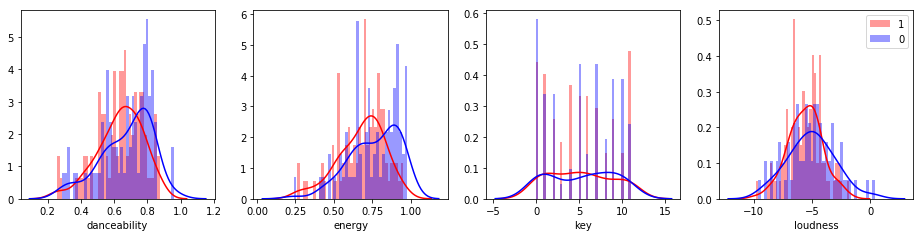

In [363]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['song_like']==1]['danceability'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['danceability'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['song_like']==1]['energy'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['energy'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['song_like']==1]['key'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['key'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['song_like']==1]['loudness'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['loudness'], color='blue', bins=40)
plt.legend((1,0))

Similarly, various other attributes like **mode**, **acousticness**, **tempo** and technical audio analysis features like **bars**, **segments** and **sections** are visualized.

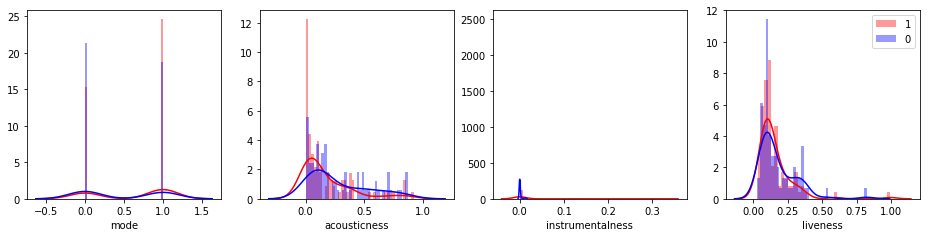

In [364]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['song_like']==1]['mode'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['mode'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['song_like']==1]['acousticness'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['acousticness'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['song_like']==1]['instrumentalness'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['instrumentalness'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['song_like']==1]['liveness'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['liveness'], color='blue', bins=40)
plt.legend((1,0))

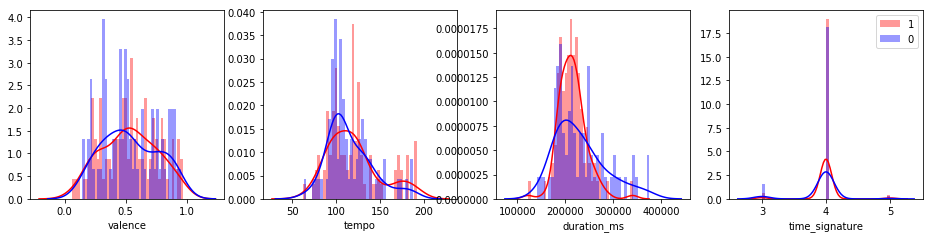

In [365]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['song_like']==1]['valence'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['valence'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['song_like']==1]['tempo'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['tempo'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['song_like']==1]['duration_ms'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['duration_ms'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['song_like']==1]['time_signature'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['time_signature'], color='blue', bins=40)
plt.legend((1,0))

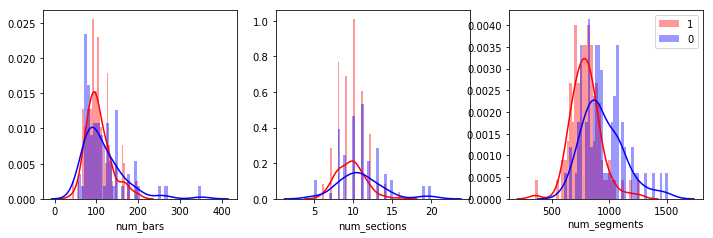

In [366]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['song_like']==1]['num_bars'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['num_bars'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['song_like']==1]['num_sections'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['num_sections'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['song_like']==1]['num_segments'], color='red', bins=40)
sns.distplot(songs[songs['song_like']==0]['num_segments'], color='blue', bins=40)
plt.legend((1,0))

## Building Machine Learning Model

### Logistic Regression 

Here we will be exploring couple of different machine learning classifiers and the one which performs better will be used for prediction purposes. The first classifier is **Logistic Regression**.

Below four new dataframes are created for building the classifier.

In [367]:
X_train = prediction.drop('song_like', axis=1)
X_test = songs.drop(['song_like','title'], axis=1)
y_train = prediction['song_like']
y_test = songs['song_like']

We can see how these four dataframes look and the information stored in it.

In [368]:
X_train.head()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,pred_class
0,0.279,0.742,4,-6.460,0,0.000185,0.000000,0.5930,0.328,189.868,231013,4,162,11,921,1
1,0.692,0.497,2,-7.316,1,0.676000,0.000000,0.2590,0.475,81.308,122067,4,42,6,353,1
2,0.592,0.800,6,-4.931,0,0.056100,0.000002,0.0775,0.728,89.972,224813,4,83,8,914,0
3,0.664,0.705,1,-4.972,0,0.065400,0.000000,0.1180,0.477,122.016,257267,4,129,8,1001,0
4,0.605,0.822,0,-4.833,1,0.006710,0.134000,0.1470,0.288,167.997,187147,4,128,10,614,1


In [369]:
X_test.head()

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,pred_class
0,0.279,0.742,4,-6.460,0,0.000185,0.000000,0.5930,0.328,189.868,231013,4,162,11,921,1
1,0.692,0.497,2,-7.316,1,0.676000,0.000000,0.2590,0.475,81.308,122067,4,42,6,353,1
2,0.592,0.800,6,-4.931,0,0.056100,0.000002,0.0775,0.728,89.972,224813,4,83,8,914,0
3,0.664,0.705,1,-4.972,0,0.065400,0.000000,0.1180,0.477,122.016,257267,4,129,8,1001,0
4,0.605,0.822,0,-4.833,1,0.006710,0.134000,0.1470,0.288,167.997,187147,4,128,10,614,1


In [370]:
y_train.tail()

70    0
71    0
72    0
73    0
74    0
Name: song_like, dtype: int32

In [371]:
y_test.head()

0    1
1    1
2    1
3    1
4    1
Name: song_like, dtype: int32

Now **scikit-learn** library is loaded, Logistic Regression is imported for building **logistic regression** classifier.

In [424]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

Using the code shown below, **model is created and fitted** over the data.

In [375]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

H:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Finally the model is checked to analyse its performance with the help of **{Glossary - confusion matrix} and {Glossary-classification report}**. These two features help in calculating the accuracy of machine learning models. 

Here **Precision** parameter is ratio of correctly predicted positive observations to the total predicted positive observations and **Recall** parameter is  ratio of correctly predicted positive observations to the all observations. **F1 Score** is the weighted average of Precision and Recall.

In [376]:
lr_pred = lr_model.predict(X_test)
print(confusion_matrix(y_test, lr_pred))
print('\n')
print(classification_report(y_test, lr_pred))

[[46 29]
 [15 84]]


              precision    recall  f1-score   support

           0       0.75      0.61      0.68        75
           1       0.74      0.85      0.79        99

   micro avg       0.75      0.75      0.75       174
   macro avg       0.75      0.73      0.73       174
weighted avg       0.75      0.75      0.74       174



The **weighted avg** value in the **f1-score** determines the accuracy of the model. Therefore, the **accuracy(ratio of correctly predicted observation to the total observations)** of **logistic regression model is 74%**. 

### K-Nearest Neighbor Machine Learning Model 

K-Nearest Neighbors classifier is imported from scikit-learn. After this, the classifier is trained by fitting the model over the data.

In [392]:
from sklearn.neighbors import KNeighborsClassifier 

In [393]:
knn_model = KNeighborsClassifier() 
  
knn_model.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [394]:
knn_pred = knn_model.predict(X_test)
print(confusion_matrix(y_test, knn_pred))
print('\n')
print(classification_report(y_test, knn_pred))

[[41 34]
 [15 84]]


              precision    recall  f1-score   support

           0       0.73      0.55      0.63        75
           1       0.71      0.85      0.77        99

   micro avg       0.72      0.72      0.72       174
   macro avg       0.72      0.70      0.70       174
weighted avg       0.72      0.72      0.71       174



As mentioned before, **weighted avg** value of **f1-score** column will help in finding the accuracy of the model. So here the accuracy is **71%**.

Thus, we will be using **logistic regression model** for prediction purposes.

**NOTE** - You can try different machine learning models for achieving higher accuracy and for learning purposes as well.

In [425]:
songs['prediction'] = lr_pred

**Logistic Regression Model** is used for predicting **likes and dislikes** of user.

In [384]:
songs.sort_values('title').head()

,title,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,song_like,pred_class,prediction
81,22,0.661,0.729,7,-6.561,1,0.002150,0.00130,0.0477,0.668,103.987,232120,4,98,9,837,1,1,1
42,All We Know,0.662,0.586,0,-8.821,1,0.097000,0.00272,0.1150,0.296,90.000,194080,4,72,6,673,1,1,1
69,All of Me,0.422,0.264,8,-7.064,1,0.922000,0.00000,0.1320,0.331,119.930,269560,4,135,13,743,1,1,1
9,Alone,0.631,0.953,2,-3.739,1,0.024100,0.01550,0.1080,0.422,141.990,273803,4,161,16,1038,1,0,0
0,Animals,0.279,0.742,4,-6.460,0,0.000185,0.00000,0.5930,0.328,189.868,231013,4,162,11,921,1,1,1


In [385]:
final_prediction = songs[['title','song_like','prediction']]

Here we can see the prediction made by the **Logistic Regression Model**. So we have achieved our aim of this project.

In [386]:
final_prediction

,title,song_like,prediction
0,Animals,1,1
1,We Will Rock You - Remastered,1,1
2,Cheap Thrills,1,0
3,Counting Stars,1,0
4,Thunder,1,1
5,Believer,1,1
6,Titanium,1,1
7,Shot Me Down (Bang Bang My Baby Remix),1,0
8,Nashe Si Chadh Gayi,1,0
9,Alone,1,0


# Conclusion

Concluding the article, we learned how we can **predict which songs user will like** based on the playlist listened on spotify with the help of Machine Learning Classifier. We covered the steps for scraping data from spotify using the **Web API** of spotify i.e. **Spotipy**. Along with this, Data Visualization was covered in the article. Lastly, we got to know how we can evaluate the performance of a machine learning classifer with the help of **confusion matrix and classification report**.

## Glossary

### 1. Confusion Matrix
Confusion Matrix is a tabular layout heling in evaluation the performance of a supervised algorithm. There are four parameters, namely True Positive, False Positive, True Negative and False Negative.

### 2. Classification Report
It is a measure which helps in analysing quality of predictions from a classification algorithm. It tells how many predictions are True and how many are False. 